In [76]:
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [78]:
df = pd.read_csv('fifa_finish.csv')

In [79]:
df.head()

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,finishing
0,90,93,32,76,93,63,85,95,80,95,85,88,94
1,89,90,30,90,95,95,90,68,59,93,77,71,95
2,92,84,25,84,95,82,80,61,53,90,75,62,89
3,82,90,30,84,91,60,84,69,80,92,77,77,94
4,91,90,31,11,48,35,70,78,83,12,15,25,13


In [80]:
dfcopy=df.copy()
dfcopy = dfcopy.sample(frac=1).reset_index(drop=True)
df_sliced=df.head(300)

In [81]:
df_sliced= df_sliced[["free_kick_accuracy","finishing"]]

In [82]:
df_sliced.head()

,free_kick_accuracy,finishing
0,76,94
1,90,95
2,84,89
3,84,94
4,11,13


In [83]:
len(df_sliced.index)

300

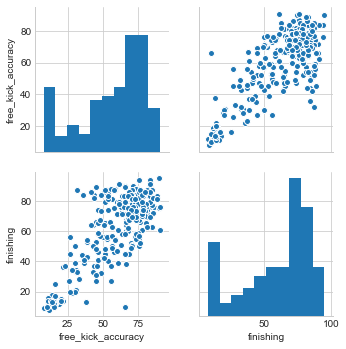

In [84]:
g=sb.pairplot(df_sliced)

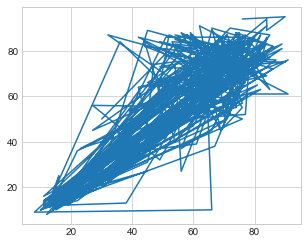

In [96]:
import matplotlib.pyplot as plt
plt.plot(df_sliced['free_kick_accuracy'], df_sliced['finishing'])
plt.show()

In [85]:
train, test = train_test_split(df_sliced, test_size = 0.30)
X_train = train.loc[:, train.columns != 'finishing']
Y_train = train.finishing
X_test = test.loc[:, test.columns != 'finishing']
Y_test = test.finishing

In [86]:
LinReg = LinearRegression (normalize=True)
LinReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [87]:
y_pred=LinReg.predict(X_test)

In [88]:
y_pred

array([48.20132665, 70.81614076, 85.28962178, 74.43451101, 79.8620664 ,
       67.1977705 , 42.77377127, 34.63243819, 76.24369614, 89.8125846 ,
       81.67125153, 65.38858537, 74.43451101, 60.86562255, 76.24369614,
       52.72428947, 35.53703076, 66.29317794, 56.34265973, 70.81614076,
       64.48399281, 39.15540101, 59.96102999, 53.62888204, 80.76665896,
       59.96102999, 18.34977204, 17.44517947, 67.1977705 , 83.48043666,
       52.72428947, 69.00695563, 53.62888204, 83.48043666, 36.44162332,
       71.72073332, 71.72073332, 50.01051178, 35.53703076, 19.2543646 ,
       76.24369614, 78.95747383, 72.62532589, 78.05288127, 56.34265973,
       19.2543646 , 20.15895717, 47.29673409, 20.15895717, 77.14828871,
       19.2543646 , 65.38858537, 50.01051178, 88.90799204, 63.57940024,
       66.29317794, 59.05643742, 83.48043666, 35.53703076, 27.39569768,
       20.15895717, 84.38502922, 34.63243819, 59.96102999, 85.28962178,
       75.33910358, 56.34265973, 51.81969691, 68.10236307, 46.39

Coefficients: 
 [0.90459256]
Mean squared error: 236.74
Variance score: 0.63


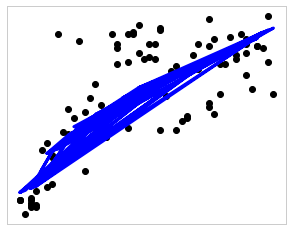

In [89]:
# The coefficients
print('Coefficients: \n', LinReg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()